In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

## Load the hand written digit dataset(MNIST) using Keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(f"The shape of the training dataset : {X_train.shape}, {y_train.shape}")
print(f"The shape of the test dataset : {X_test.shape}, {y_test.shape}")

The shape of the training dataset : (60000, 28, 28), (60000,)
The shape of the test dataset : (10000, 28, 28), (10000,)


##### So, there are in total 70,000 datapoints each categorized into 10 classes(0 to 9). This dataset is split into train and test with training dataset containing 60,000 data points and 10,000 in the test dataset. From the above shape, we can observe that each datapoint is of shape 28*28.
##### 0 - black, 1 - white

 ## Let's plot an image

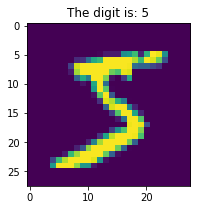

In [4]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[0])
label = "The digit is: " + str(y_train[0])
plt.title(label)
plt.show()

##### So, the above image is a representation of the digit <b>5</b>

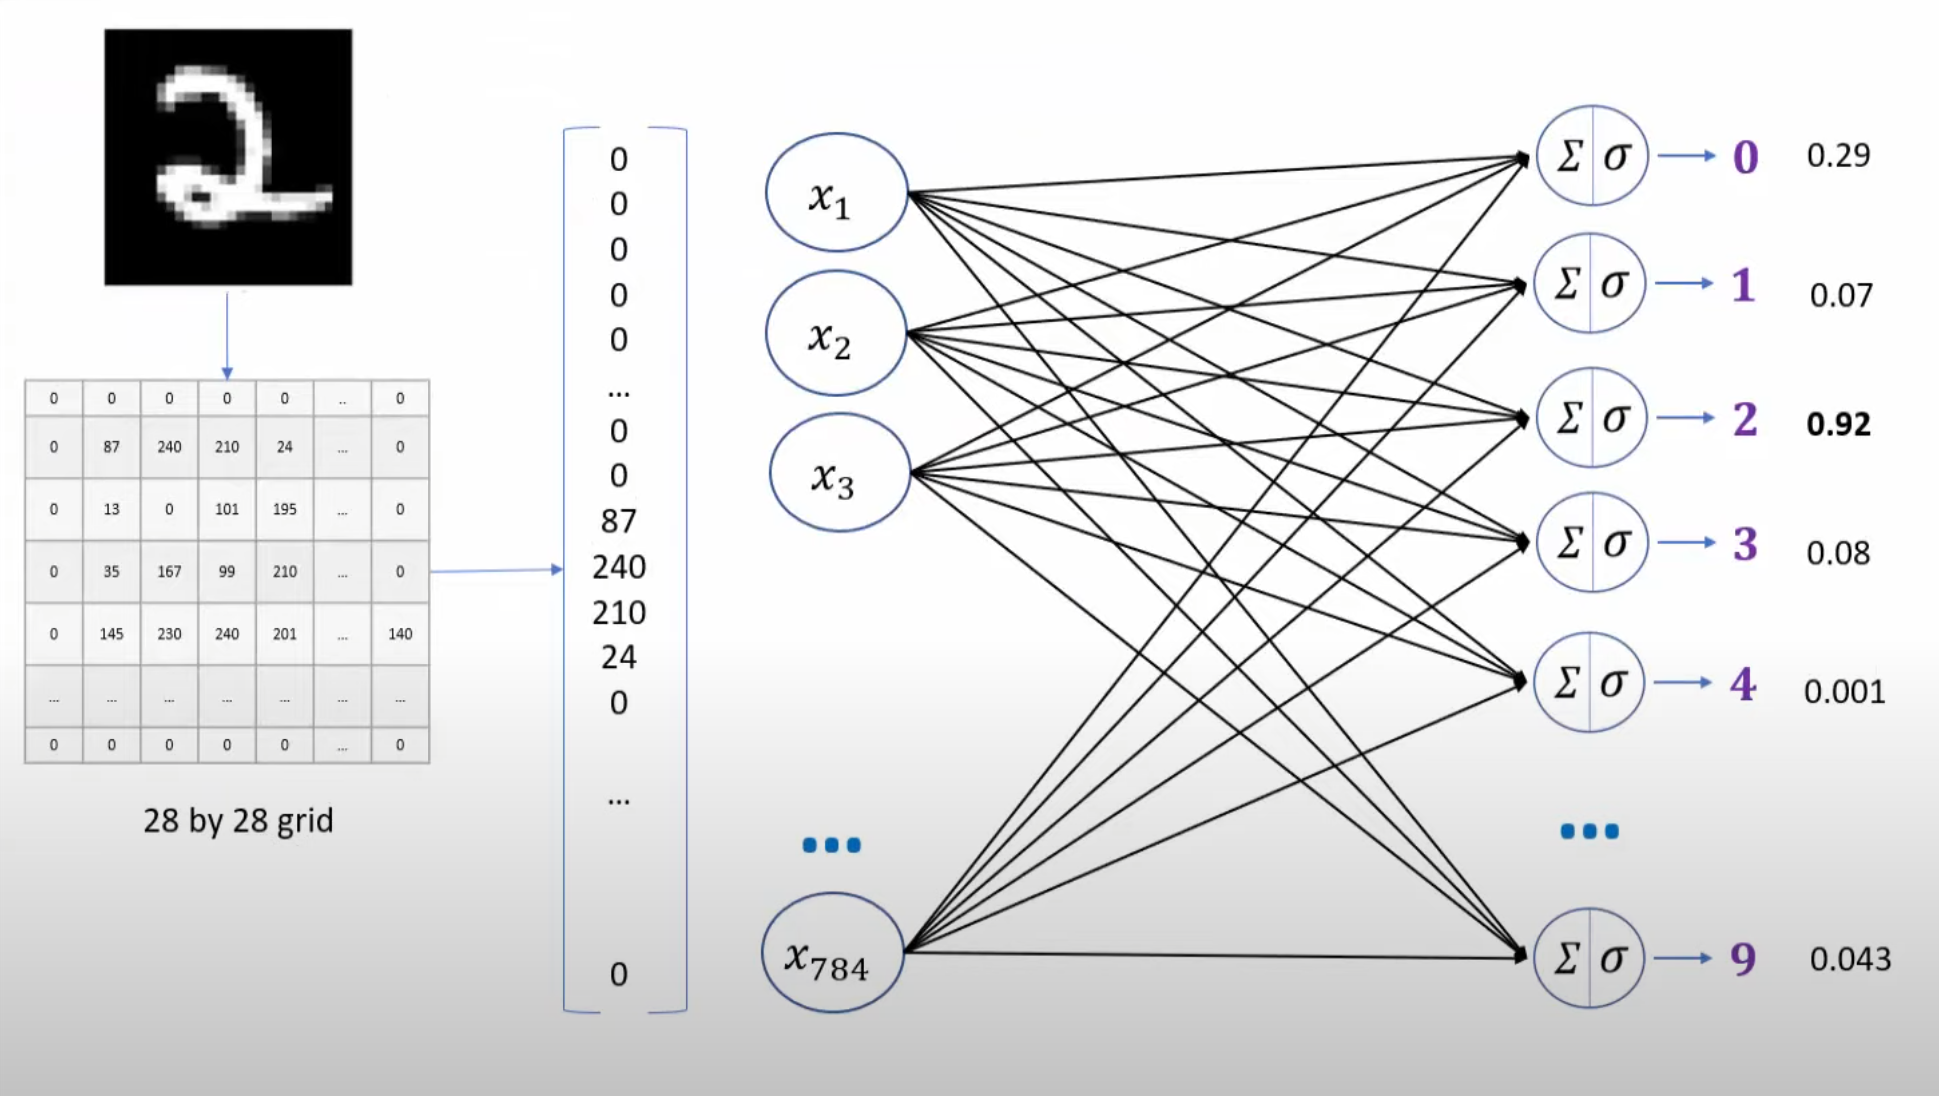

#### Based on the above image, we have to flatten the training dataset in order to feed to the neural network. So the shape we want to get is (60000, 784) after flattening it.

In [5]:
X_train_flattended = X_train.reshape(len(X_train), 28*28)
X_test_flattended = X_test.reshape(len(X_test), 28*28)

print(f"The shape of training dataset after flattening is: {X_train_flattended.shape}")
print(f"The shape of test dataset after flattening is: {X_test_flattended.shape}")

The shape of training dataset after flattening is: (60000, 784)
The shape of test dataset after flattening is: (10000, 784)


## Let's scale the dataset

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_flattended = scaler.fit_transform(X_train_flattended)
X_test_flattended = scaler.transform(X_test_flattended)

## We will first try to build a simple NN, with 2 layers- input and output

In [7]:
model = keras.Sequential([
    keras.layers.Dense(units=10, input_shape=(784,), activation="sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"],
    steps_per_execution=50
)

model.fit(X_train_flattended, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 581us/step - loss: 0.4694 - accuracy: 0.8774
Epoch 2/10
1875/1875 [==============================] - 0s 262us/step - loss: 0.3040 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 0s 263us/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 0s 237us/step - loss: 0.2732 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 0s 242us/step - loss: 0.2670 - accuracy: 0.9260
Epoch 6/10
1875/1875 [==============================] - 0s 235us/step - loss: 0.2618 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 0s 234us/step - loss: 0.2585 - accuracy: 0.9289
Epoch 8/10
1875/1875 [==============================] - 0s 236us/step - loss: 0.2551 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 0s 238us/step - loss: 0.2533 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 0s 234u

## Let's evaluate the model on the test dataset

In [8]:
model.evaluate(X_test_flattended, y_test)

313/313 [==============================] - 0s 833us/step - loss: 0.2649 - accuracy: 0.9279


[0.2648831009864807, 0.9279000163078308]

## Let's do some prediction

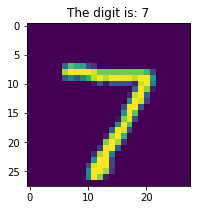

In [9]:
plt.figure(figsize=(3,3))
plt.imshow(X_test[0])
test_label = "The digit is: " + str(y_test[0])
plt.title(test_label)
plt.show()

In [10]:
predictions = model.predict(X_test_flattended)
predict_0 = np.argmax(np.array(predictions[0]))
print(f"The prediction of the model for the first test image is: {predict_0}")

313/313 [==============================] - 0s 1ms/step
The prediction of the model for the first test image is: 7


## Let's try the confusion matrix to visualize the predictions

In [11]:
y_predicted_labels = [np.argmax(arr) for arr in predictions]

In [12]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    6,   10,    2,    1,    1],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,    9,  932,   14,    8,    3,   14,    9,   35,    4],
       [   3,    0,   19,  913,    1,   29,    4,    9,   24,    8],
       [   1,    2,    5,    2,  911,    0,   10,    4,    9,   38],
       [   8,    3,    2,   25,   10,  784,   17,    8,   29,    6],
       [  10,    3,    8,    1,    7,   11,  915,    1,    2,    0],
       [   1,    6,   26,    2,    5,    1,    0,  946,    3,   38],
       [   5,    8,    6,   15,    8,   22,   11,   10,  877,   12],
       [   9,    8,    1,    7,   22,    5,    0,   17,    9,  931]])>

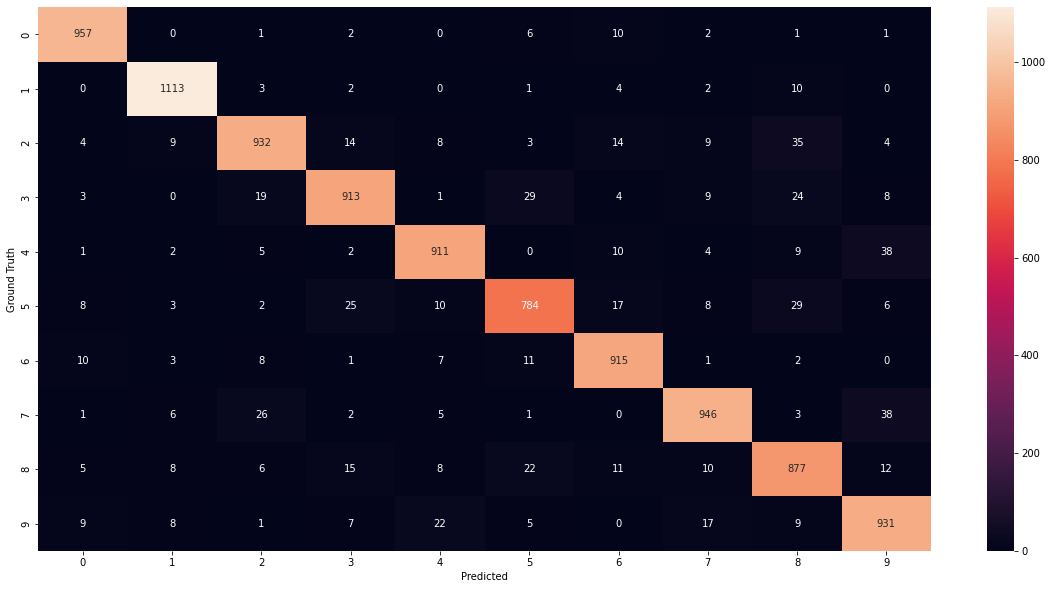

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.show()

## Adding a Hidden Layer to the model with activation function as "relu". We also try to remove flattening of the train dataset.

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(units=10, activation="sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"],
    steps_per_execution=50
)

model.fit(X_train, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 1s 672us/step - loss: 2.2834 - accuracy: 0.8374
Epoch 2/6
1875/1875 [==============================] - 1s 404us/step - loss: 0.4063 - accuracy: 0.9043
Epoch 3/6
1875/1875 [==============================] - 1s 403us/step - loss: 0.2864 - accuracy: 0.9289
Epoch 4/6
1875/1875 [==============================] - 1s 394us/step - loss: 0.2465 - accuracy: 0.9370
Epoch 5/6
1875/1875 [==============================] - 1s 394us/step - loss: 0.2240 - accuracy: 0.9428
Epoch 6/6
1875/1875 [==============================] - 1s 407us/step - loss: 0.2140 - accuracy: 0.9469


## Let's evaluate the model

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 814us/step - loss: 0.2203 - accuracy: 0.9505


[0.2202903777360916, 0.9505000114440918]